In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# generate Header and payload, both assumed to be random
pl_size = 30000 #640*480*4
H_size = 64
header = np.random.randint(2,size=H_size)
pLoad = np.random.randint(2,size=pl_size)
m = np.append(header, pLoad)
if m[0] == 1:
    m = np.append([1,0,1,0], m)
else:
    m = np.append([0,1,0,1], m)
print(m)

#BPSK modulator and mixing

minv = ~m%2     #inverted message for 0 in BPSK scheme
int_freq = 100
minv_up = np.repeat(minv,2*int_freq)
m_up = np.repeat(m,2*int_freq)
t = np.linspace(-1,1,2*int_freq*len(m))
A = 1

phi1 = np.cos(2*np.pi*int_freq*t)
phi0 = -np.cos(2*np.pi*int_freq*t)

X1 = np.multiply(phi1, m_up)
X0 = np.multiply(phi0, minv_up)
X = (X1+X0)*A

# plt.plot(X[0:500])
# plt.xlabel('time in samples')
# plt.title('BPSK modulation')


[1 0 1 ... 0 1 1]


In [42]:
#AWGN channel

#generate variance from Eb/N0 array
EbN0dB = np.linspace(0,15)
EbN0 = 10 ** (EbN0dB/10)
p = 1
R = 1
var = (p/R)/(2*EbN0)
BER = np.zeros(len(var))
for var_idx in range(len(var)):
    #simulate AWGN channel
    mue = 0
    z = np.random.normal(0,np.sqrt(var[var_idx]),len(X))
    Y = z+X
    BER[var_idx] = sum(abs(X-Y))/len(X)
print(BER)


[0.56416024 0.54472105 0.52577415 0.50775356 0.49008442 0.47307433
 0.45673732 0.4406597  0.42563094 0.41098562 0.39655182 0.38283259
 0.36960667 0.35686132 0.34445554 0.33257686 0.32107628 0.30993388
 0.2991502  0.28875626 0.27886276 0.26916583 0.25976762 0.2508926
 0.24219493 0.2338626  0.22568642 0.21784945 0.21031154 0.20304772
 0.19598915 0.18915733 0.18263427 0.17630375 0.17015124 0.16430793
 0.15867042 0.15313508 0.14783058 0.14274548 0.13774051 0.13294695
 0.12839601 0.12392418 0.11964143 0.11549458 0.11151281 0.10762333
 0.10387314 0.10034766]


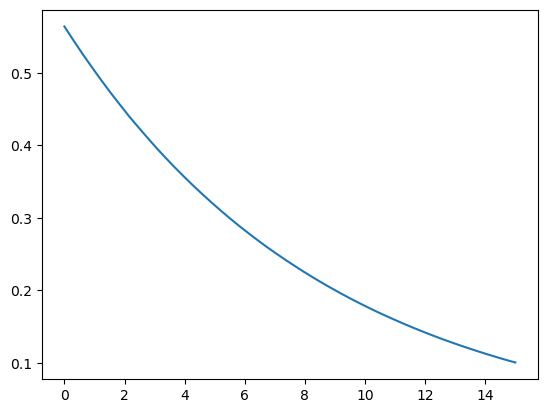

In [43]:
plt.plot(EbN0dB, BER)